# E3 — Exercises on the Cell Membrane

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Exercise 1: A simple voltage clamp model

We will now look at a simple model, where we have only the impermeable membrane, with no ion channels. We want to implement a voltage clamp, so that we can control the membrane potential as desired. Assume we manage to measure the membrane potential using a voltmeter. If our measurement shows the membrane potential to be different from our target potential, we supply a bit of applied current to the membrane, changing the membrane potential as a result.
<img src="fig/voltage_clamp_circuit.png" width=250>
We will now model what happens when we want to change the potential as a step function. We know that the membrane potential of the two components must be the same and equal to the membrane potential $V(t)$. The pipette acts as a ohmic current source, so we know that 
$$I_{\rm applied} = \frac{V - V_{\rm target}}{Rs}.$$
Any current across the pipette will lead to a similar capacitive current across the membrane, so we have
$$C_{\rm m} \frac{{\rm d}V}{{\rm d}t} = I_{\rm cap} = -I_{\rm applied}.$$
Giving an ODE for the membrane potential
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$

We will now solve this ODE to model our voltage clamp



**Exercise 1a)**

Let the prescribed membrane potential be the following step function
$$V_{\rm target} = \begin{cases}
-40 {\rm\ mV} & \mbox{if } 2 {\rm\ ms} < t < 6 {\rm\ ms}, \\
-80 {\rm\ mV}& \mbox{else.}
\end{cases}$$
Implement this as a function `V_target(t)` and plot it in the period $t\in[0, 10]$ ms.

*Hint:* Rather than use `if`-tests, you could use boolean math: `(t > 0)*(t < 1)`, which lets your function take in both a scalar t, but also a full time array.

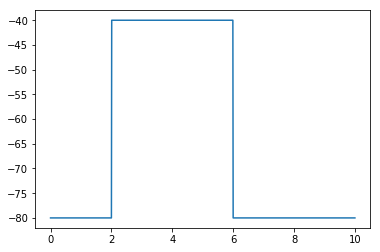

In [6]:
def V_target(t):
    return -80 + 40*(2 < t)*(t < 6)

t = np.linspace(0, 10, 1001)
plt.plot(t, V_target(t))
plt.show()

**Exercise 1b)**

We will let $V$ be denoted in mV and time in ms. Also let $C_{\rm m} = 0.05$ nF and $R_{\rm s} = 10$ M$\Omega$. Look at the ODE and make sure the units are consistent by hand. Make any necessary changes to units 
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$

**Exercise 1c)**

Implement the ODE and use `odeint` to solve it to find the membrane potential $V(t)$ in the period $t \in [0, 10]$ ms. Let $C_m = 0.05$ nF and $R_s = 10$ M$\Omega$. Let $V$ be denoted in mV and time in ms. Plot your solution.

In [7]:
def rhs(y, t, Cm, Rs):
    V = y
    
    dV_dt = (V_target(t) - V)/(Cm*Rs)
    
    return dV_dt

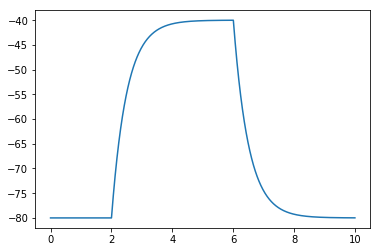

In [8]:
T = 10
dt = 0.01
time = np.arange(0, T, dt)

Cm = 0.05
Rs = 10 
param = (Cm, Rs)

V0 = -80

V = odeint(rhs, V0, time, param)
plt.plot(time, V)
plt.show()


**Exercise 1d)**

Compare your solution of $V(t)$ to your plot of the prescribed $V_{\rm target}(t)$. Describe the differences.



**(Optional) Exercise 1e)**

Solve the ODE by hand. What kind of ODE/solution is this? What is the most important functional parameter in this solution?

**Exercise 1f)**

Using the widget below, see how the membrane potential response changes as you change the membrane potential and the series resistance.

If we want the membrane potential to follow the prescribed voltage as closely as possible, what restrictions does this put on $C_{\rm m}$ and $R_{\rm s}$?


In [2]:
from L3_widgets import VoltageClampWidget
VoltageClampWidget().display()

interactive(children=(FloatSlider(value=0.05, description='Cm', max=0.1, min=0.005, step=0.005), IntSlider(val…

It is the product of the membrane capacitance and the series resistance that is important, as this is the time constant of the membranes response.
$$\tau = C_{\rm m}\cdot R_{\rm s}.$$ 
For a whole cell voltage clamp protocol, the cell membrane capacitance is typically 0.05 nF, and the series resistance is usually in the range 5-20 M$\Omega$. This gives a noticable delay in the membrane potential response, and capacitive currents that persist over several milliseconds. This can actually disturb the measurement of other currents, introducing noise to our measurements.

In another technique, the 'patch' clamp, we tear of a small part (1 µm$^2$) of the cell membrane. This means we drastically lower the capacitance $C_{\rm m}$ ($\sim0.01$ pF). In a patch clamp, the series resistance is usually in the G$\Omega$ range, so the time constant becomes very small, and there are usually no problems due to the capacitive currents.

### Exercise 2: Calculating Nernst Potentials

The following table gives typical values for mammalian cardiomyocytes, and is taken from [Katz, 2010]

| Ion        | Intracellular | Extracellular  |
| -----------|:-------------:| -----:|
| Sodium     | 8 mM          | 110 mM |
| Potassium  | 100 mM        | 4 mM  |
| Calcium    | 0.2 µM        | 1 mM  |

You will also need to know these physical constants

| Name | Symbol  | Value | Unit |
| -----------|:-------------:|-----:|------:|
| Faraday's constant  | $F$ | 96485 | C/mol |
| Gas Constant | $R$ |  8.314 | J/(mol K) |
| Temperature | $T$ | 310|  K | 





**Exercise 2a)**

Based on the tabulated values, calculate the Nernst potentials for the three ionic species.

In [12]:
F = 96485
R = 8.314
T = 310

E_Na = R*T/F * np.log(110/8)
E_K = R*T/F * np.log(4/100)
E_Ca = R*T/(2*F) * np.log(1/0.0002)

print(E_Na*1e3)
print(E_K*1e3)
print(E_Ca*1e3)

70.01407682995614
-85.9837012848195
113.75707467463714



**Exercise 2b)**

You have received two positive answers, and one negative. Explain why this is the case.



**Exercise 2c)**

Assume we have a membrane that is at a potential of -80 mV. We now open sodium channels in the membrane. Sodium ions will now start to enter the cell, increasing the membrane potential untill it reaches the Nernst potential for sodium in the cell. Estimate the number of Na$^+$-ions that cross the membrane for this change to occur
* *Hint 1:* Recall that $\Delta Q = C_m \Delta V$.
* *Hint 2:* You can use Faraday's constant to go from a charge to the number of charged particles.

Assuming the cell has a total volume of 20 picoliters, how much does the sodium concentration change as a result of this?


In [19]:
Cm = 0.05e-9 # Nanofarad
dV = 150e-3 # millivolt

dQ = Cm*dV # Coloumb

dNa = dQ/F # Change in mols

print("{:.2e} mols of Na crosses the membrane".format(dNa))



7.77e-17 mols of Na crosses the membrane


**Exercise 2d)**

Assume the intracellular sodium increases by 30%, how much does the Nernst potential change?



**Exercise 2e)**

Based on your answers to the last two exercises. Explain why the Nernst potential can be considered a constant, despite it being a function of the intracellular and extracellular concentrations.

**Note:** The Nernst potential is usually considered a constant for most species, but due to the initially very low intracellular calcium, the Nernst potential of calcium changes more drastically than for other species, which potentially can be a source of error in models.

### Exercise 3: The Equilibrium Membrane Potential

**Exercise 3a)**
Solve the following ODE numerically
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

Let $C_{\rm m} = 0.05$ nF and $g_{\rm Na}=0.005$  µS. Let the membrane potential be given in units of mV and time in units if ms. Make sure all units are compatible, and make any necessary changes.

Assume an initial membrane potential of $V_0 = -80$ mV, and solve the ODE for $t\in[0, 200]$ ms.

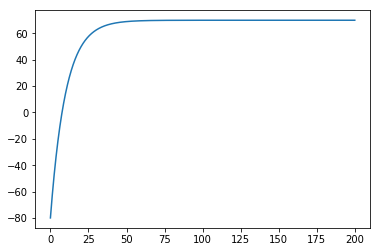

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Cm = 0.05 # nF
g_Na = 0.005 # µS
E_Na = 70 # mV


def rhs(V, t):
    dV_dt = -g_Na*(V - E_Na)/Cm - g_K*(V - E_K)/Cm - g_Ca*(V - E_Ca)/Cm
    return dV_dt

T = 200
dt = 0.01
time = np.arange(0, T, dt)
V0 = -80

V = odeint(rhs, V0, time)
plt.plot(time, V)
plt.show()

**(Optional) Exercise 3b)**

Solve the ODE by hand. What is the time constant in the exponential relaxation?
* *Hint:* Using the subsitution $u = V-E_{\rm Na}$ turns the equation into an exponential decay ODE, which is separable.


**Exercise 3c)**

Plot your solution. How long does it take for the membrane potential to equilibriate? Compare this with your time constant from 3b (if you did it).

In [ ]:
# your code here

** Exercise 3d)**

Now add a calcium current and a potassium current to your ODE system. Let $g_{\rm Ca} = 0.002$ µS and $g_{\rm K} = 0.05$ µS. Solve the equation from an initial potential of $V_0 = 0$ mV for $t \in [0, 200]$ ms.

In [ ]:
# your code here

**Exercise 3e)**

Plot your solution. What is the equilibrium potential of the system now? Explain why. Does the initial membrane potential impact what the equilibrium potential is?

**Exercise 3f)**

The resting membrane potential of the cell is around -80 mV. This is very close to the Nernst potential of potassium, but far from those of sodium and calcium. It is thus reasonable to say that a cell at rest must be much more permeable to potassium, than either of the other two species.

Using the widget below, estimate roughly how much stronger the potassium conductance is for a cell at rest.



In [24]:
from L3_widgets import MembraneWidget
MembraneWidget().display()

interactive(children=(IntSlider(value=5, description='g_Na', max=30), IntSlider(value=5, description='g_Ca', m…